Name: Hanh Tran

Class: DSC 630

Final Project

In [1]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras

In [2]:
%matplotlib inline
import pandas_datareader
import datetime
import pandas_datareader.data as web
from pandas.plotting import scatter_matrix
from sklearn.linear_model import Ridge

In [3]:
start = datetime.datetime(2010, 1, 12)
end = datetime.datetime(2021, 1, 19)

In [4]:
csiq = web.DataReader('CSIQ', 'yahoo', start, end)
csiq.to_csv('csiq.csv')

In [5]:
nee = web.DataReader('NEE', 'yahoo', start, end)
nee.to_csv('nee.csv')

In [6]:
fslr = web.DataReader('FSLR', 'yahoo', start, end)
fslr.to_csv('fslr.csv')

In [7]:
SP500 = web.DataReader('^GSPC', 'yahoo', start, end)
SP500.to_csv('sp500.csv')

In [8]:
close_prices_df = pd.read_csv('stock_prices.csv')
close_prices_df

Date       CSIQ        FSLR        NEE        sp500
0     1/12/2010  30.469999  132.979996  12.830000  1136.219971
1     1/13/2010  30.740000  132.119995  12.875000  1145.680054
2     1/14/2010  28.010000  124.839996  12.502500  1148.459961
3     1/15/2010  25.930000  124.070000  12.637500  1136.030029
4     1/19/2010  26.320000  123.940002  12.722500  1150.229980
...         ...        ...         ...        ...          ...
2769  1/12/2021  55.980000  104.320000  79.750000  3801.189941
2770  1/13/2021  54.450001  104.180000  81.839996  3809.840088
2771  1/14/2021  55.619999  106.040001  82.529999  3795.540039
2772  1/15/2021  51.270000   96.580002  82.040001  3768.250000
2773  1/19/2021  55.029999  100.239998  82.809998  3798.909912

[2774 rows x 5 columns]

In [9]:
close_prices_df.head()

Date       CSIQ        FSLR      NEE        sp500
0  1/12/2010  30.469999  132.979996  12.8300  1136.219971
1  1/13/2010  30.740000  132.119995  12.8750  1145.680054
2  1/14/2010  28.010000  124.839996  12.5025  1148.459961
3  1/15/2010  25.930000  124.070000  12.6375  1136.030029
4  1/19/2010  26.320000  123.940002  12.7225  1150.229980

In [10]:
volume_df = pd.read_csv('stock_volume.csv')
volume_df

Date     CSIQ     FSLR       NEE       sp500
0     1/12/2010  2017800  2087900  22500400  4716160000
1     1/13/2010  2268700  1805600  23431200  4170360000
2     1/14/2010  5305100  8294100  32314400  3915200000
3     1/15/2010  5488200  3771900  24167600  4758730000
4     1/19/2010  3840900  3574400  14181200  4724830000
...         ...      ...      ...       ...         ...
2769  1/12/2021  1963500  2667900   7669300  4977210000
2770  1/13/2021  1999500  1776600   8542600  4590420000
2771  1/14/2021  1641900  2429500   8899000  5180140000
2772  1/15/2021  2368700  4176000  10560700  5353060000
2773  1/19/2021  2176981  2561422   7395639  2461801091

[2774 rows x 5 columns]

In [11]:
close_prices_df.isnull().sum()

Date     0
CSIQ     0
FSLR     0
NEE      0
sp500    0
dtype: int64

In [12]:
volume_df.isnull().sum()

Date     0
CSIQ     0
FSLR     0
NEE      0
sp500    0
dtype: int64

In [13]:
close_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2774 non-null   object 
 1   CSIQ    2774 non-null   float64
 2   FSLR    2774 non-null   float64
 3   NEE     2774 non-null   float64
 4   sp500   2774 non-null   float64
dtypes: float64(4), object(1)
memory usage: 108.5+ KB


In [14]:
volume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2774 non-null   object
 1   CSIQ    2774 non-null   int64 
 2   FSLR    2774 non-null   int64 
 3   NEE     2774 non-null   int64 
 4   sp500   2774 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 108.5+ KB


In [15]:
close_prices_df.describe()

CSIQ         FSLR          NEE        sp500
count  2774.000000  2774.000000  2774.000000  2774.000000
mean     17.497221    62.063410    30.972496  2086.077349
std       9.753073    32.458512    16.684003   681.142840
min       2.030000    11.770000    11.392500  1022.580017
25%      12.200000    42.592500    17.368750  1416.262543
50%      16.290000    53.240002    25.888750  2052.969971
75%      22.410000    68.480003    40.055000  2663.912476
max      56.610001   170.800003    82.809998  3824.679932

In [16]:
volume_df.describe()

CSIQ          FSLR           NEE         sp500
count  2.774000e+03  2.774000e+03  2.774000e+03  2.774000e+03
mean   1.736914e+06  2.993139e+06  8.330487e+06  3.828179e+09
std    1.643047e+06  2.843135e+06  3.780699e+06  9.432426e+08
min    4.360000e+04  2.907000e+05  1.387500e+06  1.025000e+09
25%    6.870000e+05  1.389400e+06  5.935400e+06  3.273135e+09
50%    1.266900e+06  2.149000e+06  7.479800e+06  3.653715e+09
75%    2.217425e+06  3.499750e+06  9.498400e+06  4.192812e+09
max    2.118670e+07  4.017120e+07  4.098000e+07  1.061781e+10

In [17]:
#function to create interactive plot with Plotly Express
def interact_plot(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        #plot every column in dataset
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
    fig.show()

In [18]:
interact_plot(close_prices_df, 'Stock Prices')

In [19]:
interact_plot(volume_df, 'Stock Volume')

In [22]:
#normalize prices from its initial price in dataset
def norm(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [23]:
interact_plot(norm(close_prices_df), 'Normalized Stock Prices')

In [24]:
interact_plot(norm(volume_df), 'Normalized Stock Volume')

For train test split the data is divided into 80% for training and 20% for testing. 
Training set: used for model training and testing set used for testing the trained model. The testing data has never been seen by the trained model before. The Model should be able to generalize and not memorize. 

In [25]:
#create a function that takes in arguments stock price, stock volume and the name of the stock
def ind_stock(price, volume, name):
    return pd.DataFrame({'Date':price['Date'], 'Close':price[name], 'Volume':volume[name]})

In [26]:
#define function to return input/output (target) data for model
#target stock price today will be tomorrow's price, shift data by one timestamp
def trade_win(data):
    n = 1
    #shift the data by one day
    data['Target'] = data[['Close']].shift(-n)
    return data

In [27]:
#
csiq_price_volume_df = ind_stock(close_prices_df, volume_df, 'CSIQ')
csiq_price_volume_df

Date      Close   Volume
0     1/12/2010  30.469999  2017800
1     1/13/2010  30.740000  2268700
2     1/14/2010  28.010000  5305100
3     1/15/2010  25.930000  5488200
4     1/19/2010  26.320000  3840900
...         ...        ...      ...
2769  1/12/2021  55.980000  1963500
2770  1/13/2021  54.450001  1999500
2771  1/14/2021  55.619999  1641900
2772  1/15/2021  51.270000  2368700
2773  1/19/2021  55.029999  2176981

[2774 rows x 3 columns]

In [28]:
csiq_price_volume_target_df = trade_win(csiq_price_volume_df)
csiq_price_volume_target_df

Date      Close   Volume     Target
0     1/12/2010  30.469999  2017800  30.740000
1     1/13/2010  30.740000  2268700  28.010000
2     1/14/2010  28.010000  5305100  25.930000
3     1/15/2010  25.930000  5488200  26.320000
4     1/19/2010  26.320000  3840900  25.860001
...         ...        ...      ...        ...
2769  1/12/2021  55.980000  1963500  54.450001
2770  1/13/2021  54.450001  1999500  55.619999
2771  1/14/2021  55.619999  1641900  51.270000
2772  1/15/2021  51.270000  2368700  55.029999
2773  1/19/2021  55.029999  2176981        NaN

[2774 rows x 4 columns]

In [29]:
#remove last row which is supposed to be the target price which we don't have, NaN
csiq_price_volume_target_df = csiq_price_volume_target_df[:-1]
csiq_price_volume_target_df

Date      Close   Volume     Target
0     1/12/2010  30.469999  2017800  30.740000
1     1/13/2010  30.740000  2268700  28.010000
2     1/14/2010  28.010000  5305100  25.930000
3     1/15/2010  25.930000  5488200  26.320000
4     1/19/2010  26.320000  3840900  25.860001
...         ...        ...      ...        ...
2768  1/11/2021  56.200001  1754200  55.980000
2769  1/12/2021  55.980000  1963500  54.450001
2770  1/13/2021  54.450001  1999500  55.619999
2771  1/14/2021  55.619999  1641900  51.270000
2772  1/15/2021  51.270000  2368700  55.029999

[2773 rows x 4 columns]

In [30]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
#drop date column data because it does not make sense to scale date data
price_volume_target_scaled_df = sc.fit_transform(csiq_price_volume_target_df.drop(columns = ['Date']))

In [31]:
price_volume_target_scaled_df

array([[0.52106997, 0.09337325, 0.52601685],
       [0.52601685, 0.10524001, 0.47599853],
       [0.47599853, 0.24885187, 0.43788934],
       ...,
       [0.96042507, 0.09250772, 0.98186146],
       [0.98186146, 0.0755944 , 0.90216196],
       [0.90216196, 0.10996968, 0.97105163]])

In [32]:
price_volume_target_scaled_df.shape

(2773, 3)

In [33]:
# Creating Feature and Target
#all rows and the first 2 columns
X = price_volume_target_scaled_df[:,:2]
#target column (output), grab all the rows
y = price_volume_target_scaled_df[:,2:]

In [34]:
X

array([[0.52106997, 0.09337325],
       [0.52601685, 0.10524001],
       [0.47599853, 0.24885187],
       ...,
       [0.96042507, 0.09250772],
       [0.98186146, 0.0755944 ],
       [0.90216196, 0.10996968]])

In [35]:
y

array([[0.52601685],
       [0.47599853],
       [0.43788934],
       ...,
       [0.98186146],
       [0.90216196],
       [0.97105163]])

In [36]:
X.shape

(2773, 2)

In [37]:
y.shape

(2773, 1)

In [38]:
#use 80% of data for training and 20% for testing
split = int(0.80 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [39]:
X_train.shape, y_train.shape

((2218, 2), (2218, 1))

In [40]:
X_test.shape, y_test.shape

((555, 2), (555, 1))

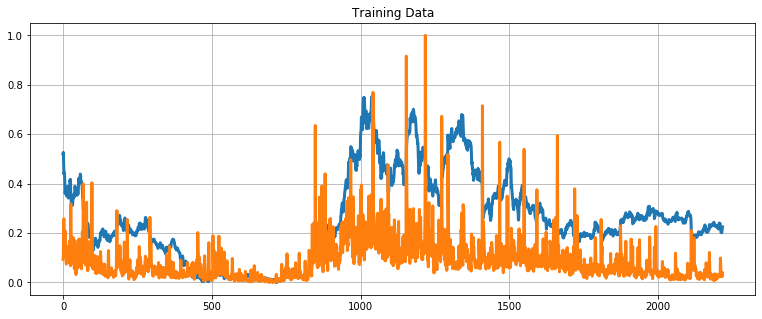

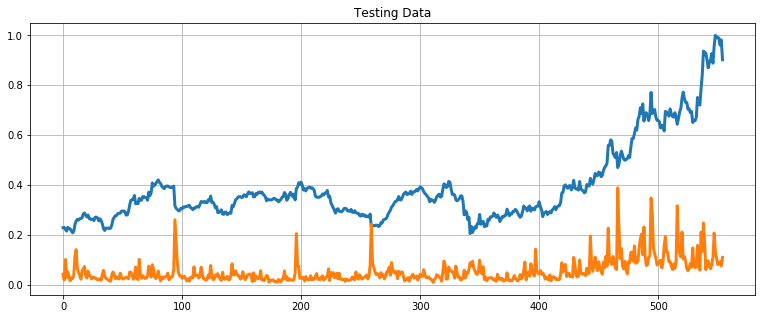

In [41]:
# Define a data plotting function
def show_plot(data, title):
  plt.figure(figsize = (13, 5))
  plt.plot(data, linewidth = 3)
  plt.title(title)
  plt.grid()

show_plot(X_train, 'Training Data')
show_plot(X_test, 'Testing Data')

In [42]:
# Ridge regression performs linear least squares with L2 regularization.
# Create and train the Ridge Linear Regression  Model
regression_model = Ridge()
regression_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [43]:
# Test the model and calculate its accuracy 
lr_accuracy = regression_model.score(X_test, y_test)
print("Linear Regression Score: ", lr_accuracy)

Linear Regression Score:  0.9855078041193334


In [44]:
# Make Prediction
predicted_prices = regression_model.predict(X)
predicted_prices

array([[0.51489551],
       [0.51996797],
       [0.47403664],
       ...,
       [0.94396877],
       [0.96456065],
       [0.88742167]])

In [45]:
# Append the predicted values into a list
predicted = []
for i in predicted_prices:
    predicted.append(i[0])

In [46]:
len(predicted)

2773

In [47]:
# Add the close values to the list
close = []
for i in price_volume_target_scaled_df:
    close.append(i[0])


In [48]:
# Create a dataframe based on the dates in the individual stock data
df_predicted = csiq_price_volume_target_df[['Date']]
df_predicted

Date
0     1/12/2010
1     1/13/2010
2     1/14/2010
3     1/15/2010
4     1/19/2010
...         ...
2768  1/11/2021
2769  1/12/2021
2770  1/13/2021
2771  1/14/2021
2772  1/15/2021

[2773 rows x 1 columns]

In [49]:
# Add the close values to the dataframe
df_predicted['Close'] = close
df_predicted

Date     Close
0     1/12/2010  0.521070
1     1/13/2010  0.526017
2     1/14/2010  0.475999
3     1/15/2010  0.437889
4     1/19/2010  0.445035
...         ...       ...
2768  1/11/2021  0.992488
2769  1/12/2021  0.988457
2770  1/13/2021  0.960425
2771  1/14/2021  0.981861
2772  1/15/2021  0.902162

[2773 rows x 2 columns]

In [50]:
# Add the predicted values to the dataframe, scaled data
df_predicted['Prediction'] = predicted
df_predicted

Date     Close  Prediction
0     1/12/2010  0.521070    0.514896
1     1/13/2010  0.526017    0.519968
2     1/14/2010  0.475999    0.474037
3     1/15/2010  0.437889    0.436994
4     1/19/2010  0.445035    0.442389
...         ...       ...         ...
2768  1/11/2021  0.992488    0.975047
2769  1/12/2021  0.988457    0.971311
2770  1/13/2021  0.960425    0.943969
2771  1/14/2021  0.981861    0.964561
2772  1/15/2021  0.902162    0.887422

[2773 rows x 3 columns]

In [51]:
# Plot the results
interact_plot(df_predicted, "Original Vs. Prediction")

In [52]:
csiq_price_volume_df

Date      Close   Volume     Target
0     1/12/2010  30.469999  2017800  30.740000
1     1/13/2010  30.740000  2268700  28.010000
2     1/14/2010  28.010000  5305100  25.930000
3     1/15/2010  25.930000  5488200  26.320000
4     1/19/2010  26.320000  3840900  25.860001
...         ...        ...      ...        ...
2769  1/12/2021  55.980000  1963500  54.450001
2770  1/13/2021  54.450001  1999500  55.619999
2771  1/14/2021  55.619999  1641900  51.270000
2772  1/15/2021  51.270000  2368700  55.029999
2773  1/19/2021  55.029999  2176981        NaN

[2774 rows x 4 columns]

In [53]:
# Get the close and volume columns as training data (Input)
training_data = csiq_price_volume_df.iloc[:, 1:3].values
training_data

array([[3.04699993e+01, 2.01780000e+06],
       [3.07399998e+01, 2.26870000e+06],
       [2.80100002e+01, 5.30510000e+06],
       ...,
       [5.56199989e+01, 1.64190000e+06],
       [5.12700005e+01, 2.36870000e+06],
       [5.50299988e+01, 2.17698100e+06]])

In [54]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_data)

In [55]:
# Create the training and testing data, training data contains present day and previous day values
X = []
y = []
for i in range(1, len(csiq_price_volume_df)):
    X.append(training_set_scaled [i-1:i, 0])
    y.append(training_set_scaled [i, 0])

In [56]:
X

[array([0.52106997]),
 array([0.52601685]),
 array([0.47599853]),
 array([0.43788934]),
 array([0.4450348]),
 array([0.43660682]),
 array([0.40564309]),
 array([0.35965555]),
 array([0.37229755]),
 array([0.38493955]),
 array([0.37284718]),
 array([0.36148772]),
 array([0.34994502]),
 array([0.3699157]),
 array([0.38475633]),
 array([0.38823743]),
 array([0.34884572]),
 array([0.36625138]),
 array([0.34133382]),
 array([0.35544156]),
 array([0.3526933]),
 array([0.37834372]),
 array([0.38420667]),
 array([0.41535362]),
 array([0.40875779]),
 array([0.41608647]),
 array([0.34481495]),
 array([0.33895201]),
 array([0.31238548]),
 array([0.31403444]),
 array([0.31623307]),
 array([0.31311837]),
 array([0.31275193]),
 array([0.33345547]),
 array([0.33895201]),
 array([0.34334922]),
 array([0.35727374]),
 array([0.34573103]),
 array([0.34591425]),
 array([0.36020521]),
 array([0.38933676]),
 array([0.38402344]),
 array([0.37321362]),
 array([0.37284718]),
 array([0.37028215]),
 array([0.358

In [57]:
# Convert the data into array format
X = np.asarray(X)
y = np.asarray(y)

In [58]:
# Split the data
split = int(0.7 * len(X))
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]

In [59]:
# Reshape the 1D arrays to 3D arrays to feed in the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_train.shape, X_test.shape

((1941, 1, 1), (832, 1, 1))

In [60]:
# Create the model using keras
inputs = keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2]))
x = keras.layers.LSTM(150, return_sequences= True)(inputs)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150, return_sequences=True)(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.LSTM(150)(x)
outputs = keras.layers.Dense(1, activation='linear')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss="mse")
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 150)            91200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 150)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 150)            180600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense (Dense)                (None, 1)                

In [61]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs = 20,
    batch_size = 32,
    validation_split = 0.2)

Epoch 1/20
49/49 [==============================] - 1s 28ms/step - loss: 0.0439 - val_loss: 0.0015
Epoch 2/20
49/49 [==============================] - 0s 8ms/step - loss: 0.0026 - val_loss: 7.0298e-05
Epoch 3/20
49/49 [==============================] - 0s 10ms/step - loss: 9.2553e-04 - val_loss: 6.8980e-05
Epoch 4/20
49/49 [==============================] - 1s 12ms/step - loss: 8.4948e-04 - val_loss: 1.7713e-04
Epoch 5/20
49/49 [==============================] - 1s 11ms/step - loss: 7.6596e-04 - val_loss: 1.3550e-04
Epoch 6/20
49/49 [==============================] - 1s 11ms/step - loss: 7.4231e-04 - val_loss: 9.7018e-05
Epoch 7/20
49/49 [==============================] - 0s 7ms/step - loss: 6.9510e-04 - val_loss: 1.8267e-04
Epoch 8/20
49/49 [==============================] - 0s 6ms/step - loss: 6.5305e-04 - val_loss: 1.2365e-04
Epoch 9/20
49/49 [==============================] - 0s 6ms/step - loss: 5.9682e-04 - val_loss: 7.4714e-05
Epoch 10/20
49/49 [==============================] - 

In [62]:
# Make prediction
predicted = model.predict(X)

In [63]:
# Append the predicted values to the list
test_predicted = []

for i in predicted:
    test_predicted.append(i[0])

In [64]:
test_predicted

[0.52559024,
 0.5303434,
 0.48205698,
 0.44494718,
 0.45192522,
 0.4436938,
 0.4133481,
 0.36799628,
 0.38049537,
 0.3929707,
 0.38103825,
 0.36980915,
 0.35837984,
 0.37814227,
 0.39279008,
 0.39622116,
 0.35729042,
 0.3745204,
 0.34984118,
 0.36382475,
 0.3611028,
 0.38646483,
 0.39224812,
 0.42288208,
 0.41640785,
 0.42360088,
 0.3532942,
 0.34747756,
 0.32106394,
 0.32270604,
 0.324895,
 0.32179382,
 0.32142887,
 0.34202027,
 0.34747756,
 0.3518405,
 0.3656388,
 0.3542026,
 0.3543843,
 0.36854017,
 0.3973043,
 0.39206752,
 0.38140017,
 0.38103825,
 0.3785043,
 0.3663642,
 0.3741581,
 0.3611028,
 0.38230485,
 0.3745204,
 0.36509463,
 0.37470156,
 0.40668333,
 0.42952853,
 0.41604793,
 0.41136745,
 0.41298804,
 0.41766724,
 0.44566327,
 0.4399318,
 0.4120878,
 0.41460812,
 0.41604793,
 0.405061,
 0.40199557,
 0.37578827,
 0.35474768,
 0.36201027,
 0.3060871,
 0.3095598,
 0.30718386,
 0.3002351,
 0.28008893,
 0.2969416,
 0.30700105,
 0.28778648,
 0.30169848,
 0.28008893,
 0.2672454,
 

In [65]:
df_predicted = csiq_price_volume_df[1:][['Date', 'Close']]
df_predicted 

Date      Close
1     1/13/2010  30.740000
2     1/14/2010  28.010000
3     1/15/2010  25.930000
4     1/19/2010  26.320000
5     1/20/2010  25.860001
...         ...        ...
2769  1/12/2021  55.980000
2770  1/13/2021  54.450001
2771  1/14/2021  55.619999
2772  1/15/2021  51.270000
2773  1/19/2021  55.029999

[2773 rows x 2 columns]

In [66]:
df_predicted['predictions'] = test_predicted
df_predicted

Date      Close  predictions
1     1/13/2010  30.740000     0.525590
2     1/14/2010  28.010000     0.530343
3     1/15/2010  25.930000     0.482057
4     1/19/2010  26.320000     0.444947
5     1/20/2010  25.860001     0.451925
...         ...        ...          ...
2769  1/12/2021  55.980000     0.949363
2770  1/13/2021  54.450001     0.946040
2771  1/14/2021  55.619999     0.922764
2772  1/15/2021  51.270000     0.940589
2773  1/19/2021  55.029999     0.873492

[2773 rows x 3 columns]

In [67]:
close = []
for i in training_set_scaled:
    close.append(i[0])

In [68]:
close

[0.521069970795828,
 0.5260168461501509,
 0.4759985334341689,
 0.43788933783782913,
 0.4450348009274966,
 0.43660682227937414,
 0.4056430899559192,
 0.3596555450564329,
 0.3722975480231196,
 0.3849395511730236,
 0.37284717755131286,
 0.3614877249543669,
 0.3499450158553524,
 0.36991570360248927,
 0.3847563296654582,
 0.3882374329592576,
 0.3488457218044629,
 0.3662513788011244,
 0.34133381569966453,
 0.3554415557323717,
 0.35269330329111365,
 0.3783437174283321,
 0.38420666514276186,
 0.41535361897378237,
 0.40875778522909084,
 0.416086470009541,
 0.34481495398796713,
 0.3389520062735374,
 0.3123854845984917,
 0.31403444317207757,
 0.3162330660851424,
 0.3131183706287534,
 0.3127519276136226,
 0.33345546639651813,
 0.3389520062735374,
 0.343349217105164,
 0.35727373563030573,
 0.34573102653129123,
 0.3459142480388566,
 0.3602052093959119,
 0.3893367620046503,
 0.3840234436351964,
 0.3732136205664437,
 0.37284717755131286,
 0.3702821466176202,
 0.35800658648284706,
 0.3658849357859935,


In [69]:
df_predicted['Close'] = close[1:]

In [70]:
df_predicted

Date     Close  predictions
1     1/13/2010  0.526017     0.525590
2     1/14/2010  0.475999     0.530343
3     1/15/2010  0.437889     0.482057
4     1/19/2010  0.445035     0.444947
5     1/20/2010  0.436607     0.451925
...         ...       ...          ...
2769  1/12/2021  0.988457     0.949363
2770  1/13/2021  0.960425     0.946040
2771  1/14/2021  0.981861     0.922764
2772  1/15/2021  0.902162     0.940589
2773  1/19/2021  0.971052     0.873492

[2773 rows x 3 columns]

In [71]:
interact_plot(df_predicted, 'Original Price vs. LSTM Predictions')

In [72]:
# Plot the data
close = []
for i in training_set_scaled:
    close.append(i[0])

In [73]:
df_predicted['Close'] = close[1:]

In [74]:
df_predicted

Date     Close  predictions
1     1/13/2010  0.526017     0.525590
2     1/14/2010  0.475999     0.530343
3     1/15/2010  0.437889     0.482057
4     1/19/2010  0.445035     0.444947
5     1/20/2010  0.436607     0.451925
...         ...       ...          ...
2769  1/12/2021  0.988457     0.949363
2770  1/13/2021  0.960425     0.946040
2771  1/14/2021  0.981861     0.922764
2772  1/15/2021  0.902162     0.940589
2773  1/19/2021  0.971052     0.873492

[2773 rows x 3 columns]